In [245]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import *

In [246]:
data = pd.read_csv(r'D:\Purdue\SecAna\Assignment 1 attached files Sep 8, 2022 540 PM\data.txt',delimiter=r"\s+", header=None,index_col=None)
#data.columns = ['X']
#pd.to_numeric(data.X, errors='coerce')
#df2 = data.apply(pd.to_numeric, errors='coerce')
#ds = data['X'].str.split(" ",expand=True)
#print(ds)

#print(data.head(3))

In [247]:
data['Y'] = np.random.randint(0,len(data)*2,size=len(data)) 
#print(data.iloc[1, :])

In [248]:
df = data.sort_values(by = "Y")  #This ensures that data is sorted randomly everytime.
L=[]
for k in range(0,81):
    L.append(k)
df1 = df.set_index(pd.Index(L))
print(df1)

      0            1    Y
0  -3.2   129.683820    2
1  -0.6   301.548220    3
2  -1.0    88.155163    5
3   9.6  2055.884500    7
4   3.0    84.885606    8
..  ...          ...  ...
76 -3.8   -78.187869  157
77  1.2   120.730430  157
78  7.2  1154.042800  157
79 -1.8   156.208480  159
80  9.2  1798.230000  161

[81 rows x 3 columns]


In [249]:
train = []
valid = []
X_train = []
y_train = []
y_valid = []
X_valid = []
xt = []
yt = []
xv = []
yv = []

#As asked in the question, we partition the randomly-sorted data into 10 folds of equal size. 
#Each fold, we split it into a ratio of 80:20 for training and validation

for i in range(0,10):
    train.append(df1.iloc[8*i:8*i+6, 0:2])
    valid.append(df1.iloc[8*i+6:8*i+8, 0:2])
    


In [250]:
scaler = StandardScaler()
#print(train[0])
for i in range(0,10):
    scaler = StandardScaler()
    train[i] = scaler.fit_transform(train[i])
    scaler = StandardScaler()
    valid[i] = scaler.fit_transform(valid[i])
    #print(train[i][0].tolist())
    #print(train[i])
    #X_train.append(train[i][0])
    #y_train.append(train[i][1])
    #X_train.append
#X_train = X_train.tolist()
#print(np.transpose(train[0])[1])
#print(train[0])
for i in range(0,10):
    X_train.append(np.transpose(train[i])[0])
    y_train.append(np.transpose(train[i])[1]) 
    X_valid.append(np.transpose(valid[i])[0])
    y_valid.append(np.transpose(valid[i])[1])
#print(train[0])
#print(X_train)
#print(y_valid)

In [251]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#print(linreg1)
#print(X_train[0])
#print(y_train[0].reshape(-1,1))
w1 = []
w2 = []
w3 = []
w4 = []
y_pred1=[]
y_pred2=[]
y_pred3=[]
y_pred4=[]
yv_pred1=[]
yv_pred2=[]
yv_pred3=[]
yv_pred4=[]
for k in range(0,10):
    poly_3 = PolynomialFeatures(degree=3, include_bias=False)
    poly_5 = PolynomialFeatures(degree=5, include_bias=False)
    poly_50 = PolynomialFeatures(degree=50, include_bias=False)
    linreg1 = LinearRegression(fit_intercept = True)
    linreg3 = LinearRegression()
    linreg5 = LinearRegression()
    linreg50 = LinearRegression()
    
    
    poly_features_3 = poly_3.fit_transform(X_train[k].reshape(-1, 1))
    poly_features_5 = poly_5.fit_transform(X_train[k].reshape(-1, 1))
    poly_features_50 = poly_50.fit_transform(X_train[k].reshape(-1, 1))
    linreg1.fit(X_train[k].reshape(-1,1), y_train[k].reshape(-1,1))
    

    #print(linreg1.coef_)
    #print(poly_3)
    linreg3.fit(poly_features_3, y_train[k].reshape(-1,1))
    linreg5.fit(poly_features_5, y_train[k].reshape(-1,1))
    linreg50.fit(poly_features_50 , y_train[k].reshape(-1,1))
    #w3.append()
    
    y_pred1.append(linreg1.predict(X_train[k].reshape(-1,1)))
    y_pred2.append(linreg3.predict(poly_features_3))
    y_pred3.append(linreg5.predict(poly_features_5))
    y_pred4.append(linreg50.predict(poly_features_50))
    
    w1.append(linreg1.intercept_.tolist() + linreg1.coef_[0].tolist())
    w2.append(linreg3.intercept_.tolist() + linreg3.coef_[0].tolist())
    w3.append(linreg5.intercept_.tolist() + linreg5.coef_[0].tolist())
    w4.append(linreg50.intercept_.tolist() + linreg50.coef_[0].tolist())
    
    #for k in range(0, len(linreg3.coef_)):
    poly_3 = PolynomialFeatures(degree=3, include_bias=False)
    poly_5 = PolynomialFeatures(degree=5, include_bias=False)
    poly_50 = PolynomialFeatures(degree=50, include_bias=False)
    
    polyv_3 = poly_3.fit_transform(X_valid[k].reshape(-1, 1))
    polyv_5 = poly_5.fit_transform(X_valid[k].reshape(-1, 1))
    polyv_50 = poly_50.fit_transform(X_valid[k].reshape(-1, 1))
    
    
    
    yv_pred1.append(linreg1.predict(X_valid[k].reshape(-1,1)))
    yv_pred2.append(linreg3.predict(polyv_3))
    yv_pred3.append(linreg5.predict(polyv_5))
    yv_pred4.append(linreg50.predict(polyv_50))
    
print(f"The weights for first hypothesis are {w1}")
print(f"The weights for second hypothesis are {w2}")  
print(f"The weights for third hypothesis are {w3}")  
print(f"The weights for fourth hypothesis are {w4}")  

The weights for first hypothesis are [[-3.524432937682972e-17, 0.80157206126032], [7.401486830834377e-17, 0.9734083237704314], [-1.193212626562308e-16, 0.8878744178920657], [1.172944159241675e-16, 0.8926433694564324], [-7.420843930069281e-17, 0.9895388050118459], [6.035880323917593e-17, 0.880991302658891], [-8.324953507099078e-17, 0.9705335824408102], [-2.4227139585131945e-16, 0.8488534028237312], [0.0, 0.7306388143924685], [7.501465958318604e-17, 0.6959680846460649]]
The weights for second hypothesis are [[-0.5272196586009191, -0.04233679329072561, 0.3631849732151949, 0.31387214187325], [0.1320942810312656, 2.0661485514233457, 0.9101534374145939, -0.6710423460350043], [-0.6839647046995054, 0.6883291094729751, 0.7658130016051469, 0.2597278895271144], [-0.6424304065292523, 0.11850010876529382, 0.7038736960635036, 0.48812254911864167], [-0.2798772895871864, 0.30564016019701434, 0.015863924593093826, 0.44763290921442594], [-0.2688328765697071, 0.36678682822327097, 0.46912280850706894, 0.3

In [252]:
training_error1=[]
training_error2=[]
training_error3=[]
training_error4=[]
validation_error1=[]
validation_error2=[]
validation_error3=[]
validation_error4=[]

for k in range(0, 10):
    training_error1.append(mean_squared_error(y_train[k],y_pred1[k]))
    training_error2.append(mean_squared_error(y_train[k],y_pred2[k]))
    training_error3.append(mean_squared_error(y_train[k],y_pred3[k]))
    training_error4.append(mean_squared_error(y_train[k],y_pred4[k]))
    validation_error1.append(mean_squared_error(y_valid[k],yv_pred1[k]))
    validation_error2.append(mean_squared_error(y_valid[k],yv_pred2[k]))
    validation_error3.append(mean_squared_error(y_valid[k],yv_pred3[k]))
    validation_error4.append(mean_squared_error(y_valid[k],yv_pred4[k]))
print(f"The average training error and standard deviation for first hypotheses are {np.mean(training_error1):.4f} and {np.std(training_error1)}")
print(f"The average training error and standard deviation for second hypotheses are {np.mean(training_error2)} and {np.std(training_error2)}")
print(f"The average training error and standard deviation for third hypotheses are {np.mean(training_error3)} and {np.std(training_error3)}")
print(f"The average training error and standard deviation for fourth hypotheses are {np.mean(training_error4)} and {np.std(training_error4)}")


The average training error and standard deviation for first hypotheses are 0.2389 and 0.16161519049033407
The average training error and standard deviation for second hypotheses are 0.0841758496211379 and 0.11579973111717298
The average training error and standard deviation for third hypotheses are 5.319942720133294e-26 and 1.4095651763739002e-25
The average training error and standard deviation for fourth hypotheses are 0.018842793192225295 and 0.0439942884543943


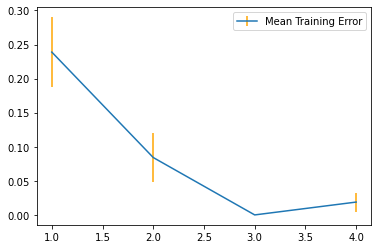

In [253]:
X =[]
Y =[]
for k in range(0,4):
    X.append(k+1)
Y = [np.mean(training_error1),np.mean(training_error2),np.mean(training_error3),np.mean(training_error4)]
Yerr = [np.std(training_error1)/np.sqrt(10),np.std(training_error2)/np.sqrt(10),np.std(training_error3)/np.sqrt(10),np.std(training_error4)/np.sqrt(10)]

plt.errorbar(X,Y,yerr = Yerr,ecolor="orange" ,label="Mean Training Error")
#plt.errorbar(X,Y,label="Standard Deviation/SquareRoot10")
plt.legend(loc="best")

In [254]:
print(f"The index of validation set with minimum training error for first hypothesis is {training_error1.index(min(training_error1))}")
print(f"The index of validation set with minimum training error for second hypothesis is {training_error2.index(min(training_error2))}")
print(f"The index of validation set with minimum training error for third hypothesis is {training_error3.index(min(training_error3))}")
print(f"The index of validation set with minimum training error for fourth hypothesis is {training_error4.index(min(training_error4))}")

The index of validation set with minimum training error for first hypothesis is 4
The index of validation set with minimum training error for second hypothesis is 2
The index of validation set with minimum training error for third hypothesis is 3
The index of validation set with minimum training error for fourth hypothesis is 4


In [255]:
print(f"The minimum training error for the first hypothesis is {min(training_error1)}")
print(f"The minimum training error for the second hypothesis is {min(training_error2)}")
print(f"The minimum training error for the third hypothesis is {min(training_error3)}")
print(f"The minimum training error for the fourth hypothesis is {min(training_error4)}")

The minimum training error for the first hypothesis is 0.020812953375728957
The minimum training error for the second hypothesis is 0.0015593062269605258
The minimum training error for the third hypothesis is 1.1298789007071784e-30
The minimum training error for the fourth hypothesis is 8.903120899994366e-18


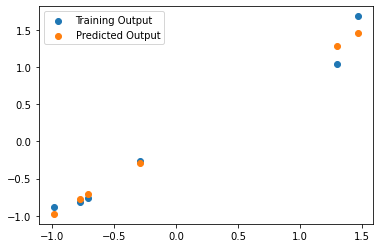

In [256]:
plt.scatter(X_train[training_error1.index(min(training_error1))],y_train[training_error1.index(min(training_error1))],label="Training Output")
plt.scatter(X_train[training_error1.index(min(training_error1))],y_pred1[training_error1.index(min(training_error1))],label="Predicted Output")
#plt.scatter(X_train[training_error1.index(min(training_error1))],y_train[training_error1.index(min(training_error1))],label="Minimum Error Output")
plt.legend(loc="best")

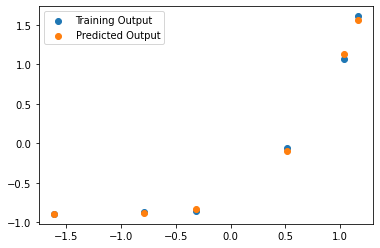

In [257]:
plt.scatter(X_train[training_error2.index(min(training_error2))],y_train[training_error2.index(min(training_error2))],label="Training Output")
plt.scatter(X_train[training_error2.index(min(training_error2))],y_pred2[training_error2.index(min(training_error2))],label="Predicted Output")
#plt.scatter(X_train[training_error1.index(min(training_error1))],y_train[training_error1.index(min(training_error1))],label="Minimum Error Output")
plt.legend(loc="best")

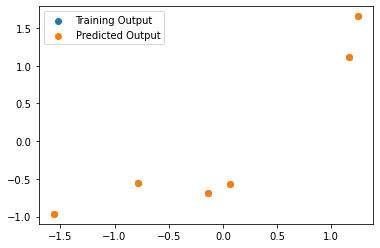

In [258]:
plt.scatter(X_train[training_error3.index(min(training_error3))],y_train[training_error3.index(min(training_error3))],label="Training Output")
plt.scatter(X_train[training_error3.index(min(training_error3))],y_pred3[training_error3.index(min(training_error3))],label="Predicted Output")
#plt.scatter(X_train[training_error1.index(min(training_error1))],y_train[training_error1.index(min(training_error1))],label="Minimum Error Output")
plt.legend(loc="best")

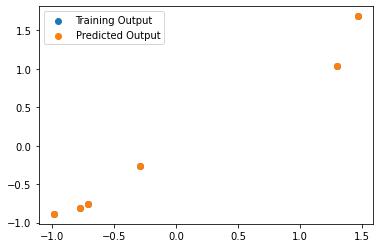

In [259]:
plt.scatter(X_train[training_error4.index(min(training_error4))],y_train[training_error4.index(min(training_error4))],label="Training Output")
plt.scatter(X_train[training_error4.index(min(training_error4))],y_pred4[training_error4.index(min(training_error4))],label="Predicted Output")
#plt.scatter(X_train[training_error1.index(min(training_error1))],y_train[training_error1.index(min(training_error1))],label="Minimum Error Output")
plt.legend(loc="best")

In [260]:
print(f"I would go with the third hyposthesis. We know that the error gradually decreses as we increase the model complexity, but the third hypothesis' error is lesser than that of the fourth hypothesis which has degree of 50. This indicates that the data fits the third hypothesis best")

I would go with the third hyposthesis. We know that the error gradually decreses as we increase the model complexity, but the third hypothesis' error is lesser than that of the fourth hypothesis which has degree of 50. This indicates that the data fits the third hypothesis best
